In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

    def get_hyperplane_value(self, x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

In [39]:
def generate_data(n_samples=100):
    X1 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
    y1 = np.ones(n_samples//2)

    X2 = np.random.randn(n_samples//2, 2) + np.array([-2, -2])
    y2 = -np.ones(n_samples//2)

    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    return X, y

In [40]:
def visualize_svm(X, y, svm_clf):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    plt.figure(figsize=(10,7))

    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', label='Class 1')
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], c='r', label='Class -1')

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm_clf.w, svm_clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, svm_clf.w, svm_clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm_clf.w, svm_clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm_clf.w, svm_clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm_clf.w, svm_clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm_clf.w, svm_clf.b, 1)

    plt.plot([x0_1, x0_2], [x1_1, x1_2], 'y-', label='Decision Boundary')
    plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k--', label='Support Vector -1')
    plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k--', label='Support Vector +1')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.title('SVM Decision Boundary and Support Vectors')
    plt.grid(True)
    plt.show()

In [41]:
X, y = generate_data(n_samples=100)

In [42]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iterations=10000)
svm.fit(X, y)

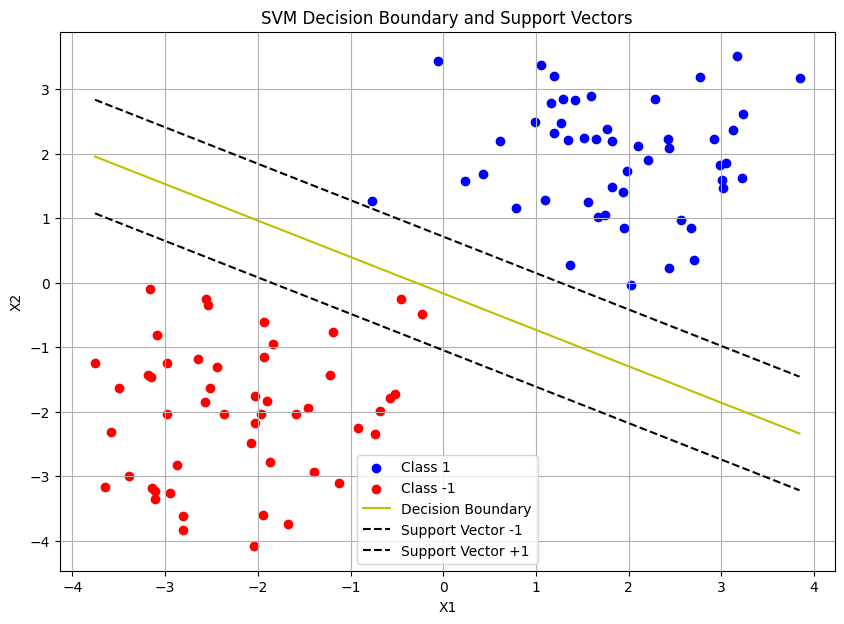

In [43]:
predictions = svm.predict(X)
visualize_svm(X, y, svm)